# Grouping College Towns Using Foursquare Data

Foursquare credentials

In [223]:
# CLIENT_ID = 'TPODZ0AY5XEFZAKBYHAJPPFRS4HZRUJHQOFKW302YOXGVQFW' # my Foursquare ID
# CLIENT_SECRET = 'GQUV3IGVGP0UTD5ALKGCX01JKE5DP1LXHQQAC1LUA11U3GSE' # my Foursquare Secret
# VERSION = '20180605' # Foursquare API version

API calls

In [224]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['University', 
                  'University Latitude', 
                  'University Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [225]:
import pandas as pd
import requests

University and location data import (needed for API calls).

In [226]:
data=pd.read_csv('data_prepared.csv')

In [227]:
# venues = getNearbyVenues(data['University'], data['Latitude'], data['Longitude'], radius=700)

In [228]:
# venues.to_csv('raw_venues_data.csv')

Venues data imported from a previous run of the foursquare API calls.

In [229]:
venues = pd.read_csv('raw_venues_data.csv')

In [230]:
venues.columns.tolist()

['Unnamed: 0',
 'University',
 'University Latitude',
 'University Longitude',
 'Venue',
 'Venue Latitude',
 'Venue Longitude',
 'Venue Category']

## Data Inspection

We remove universities for which we do not have enough venues to characterize their surrounding areas (threshold chosen at 5 venues).

In [231]:
venues.set_index('University').loc['Wesleyan University']

,Unnamed: 0,University Latitude,University Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
University,,,,,,,
Wesleyan University,1832,41.555903,-72.655988,Pi Cafe,41.553540,-72.657780,Café
Wesleyan University,1833,41.555903,-72.655988,Tuscany Grill,41.558896,-72.649391,Italian Restaurant
Wesleyan University,1834,41.555903,-72.655988,Klekolo World Coffee,41.560129,-72.650805,Coffee Shop
Wesleyan University,1835,41.555903,-72.655988,Thai Gardens,41.559322,-72.649151,Thai Restaurant
Wesleyan University,1836,41.555903,-72.655988,Tandoor Indian Cousine,41.558885,-72.648669,Indian Restaurant
Wesleyan University,1837,41.555903,-72.655988,The Pickle Stand,41.559113,-72.648946,Sandwich Place
Wesleyan University,1838,41.555903,-72.655988,Freeman Athletic Center,41.551019,-72.660429,Gym / Fitness Center
Wesleyan University,1839,41.555903,-72.655988,Brewbakers,41.558863,-72.648767,Breakfast Spot
Wesleyan University,1840,41.555903,-72.655988,Red & Black Cafe,41.557392,-72.650572,Café


Use "1-hot" encoding to group venues by category.

In [232]:
colleges_onehot = pd.get_dummies(venues['Venue Category'])

In [233]:
colleges_onehot['University'] = venues['University']

In [234]:
colleges_onehot.groupby('University').count()

,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
University,,,,,,,,,,,,,,,,,,,,,
Amherst College,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
Barnard College,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
Bates College,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Boston College,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Boston University,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington & Lee University,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Washington University in St. Louis,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Wellesley College,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [235]:
venues_running_count = colleges_onehot.groupby('University').sum()

In [236]:
data[~data.University.isin(venues_running_count.index.tolist())]

,Unnamed: 0,University,Rank,Small,Medium,Large,Public,Private,Liberal Arts,Total Cost of Attendance,...,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost,Latitude,Longitude
11,11,Vanderbilt University,12.0,False,True,False,False,True,False,71110.0,...,9.0,True,True,False,27.0,53134.0,17976.0,56740.0,37.708754,-85.547034
34,34,Williams College,35.0,True,False,False,False,True,True,75520.0,...,8.0,True,True,False,59.0,66066.0,9454.0,36215.0,42.709742,-73.239836
68,68,Bucknell University,70.0,False,True,False,False,False,True,75400.0,...,7.0,True,True,False,54.0,58757.0,16643.0,43932.0,35.512296,-87.374210


In [237]:
venues_running_count[venues_running_count.sum(axis=1) > 5]

,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
University,,,,,,,,,,,,,,,,,,,,,
Amherst College,0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Barnard College,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Bates College,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boston College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boston University,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Forest University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Washington University in St. Louis,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wellesley College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
venues_counts = venues_running_count[venues_running_count.sum(axis=1) > 5]

## Feature Grouping

We group similar venues into category groups, reducing the number of columns in the data frame in the process. Then we drop categories and category groups that are below a certain threshold in total number.

In [239]:
venues_counts['MUSEUM'] = venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Museum')].tolist()].sum(axis=1)

/Users/ben/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [240]:
venues_counts['MUSEUM']

University
Amherst College                       2
Barnard College                       1
Bates College                         0
Boston College                        0
Boston University                     0
                                     ..
Wake Forest University                1
Washington University in St. Louis    0
Wellesley College                     1
Wesleyan University                   0
Yale University                       3
Name: MUSEUM, Length: 69, dtype: int64

In [241]:
venues_counts.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'American Restaurant',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arepa Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Resta

In [242]:
reduced = venues_counts

In [243]:
reduced = reduced.drop(columns=venues_counts.columns[venues_counts.columns.str.contains('Museum')])

In [244]:
reduced.columns[reduced.nunique() == 1]

Index(['Airport', 'Construction & Landscaping', 'Skating Rink'], dtype='object')

In [245]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'American Restaurant',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arepa Restaurant',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Choco

In [246]:
reduced.nunique()[reduced.columns.str.contains('Joint')]

BBQ Joint              2
Burger Joint           4
Fried Chicken Joint    2
Hot Dog Joint          2
Wings Joint            2
dtype: int64

In [247]:
reduced['JOINT'] = venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Joint')].tolist()].sum(axis=1)

In [248]:
reduced = reduced.drop(columns=venues_counts.columns[venues_counts.columns.str.contains('Joint')])

In [249]:
reduced.nunique()[reduced.columns.str.contains('Bookstore')]

Bookstore            5
College Bookstore    2
Used Bookstore       2
dtype: int64

In [250]:
reduced['BOOKSTORE'] = venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Bookstore')].tolist()].sum(axis=1)

In [251]:
reduced = reduced.drop(columns=venues_counts.columns[venues_counts.columns.str.contains('Bookstore')])

In [252]:
input = venues_counts.columns.str.contains('Bookstore')

In [253]:
venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Place')].tolist()]

,Burrito Place,Pizza Place,Poke Place,Salad Place,Sandwich Place,Snack Place,Soup Place,Taco Place
University,,,,,,,,
Amherst College,1,1,0,0,2,0,0,0
Barnard College,0,2,0,1,3,0,0,0
Bates College,0,0,0,0,0,0,0,0
Boston College,0,1,0,0,0,0,0,0
Boston University,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
Wake Forest University,0,0,0,0,1,0,0,0
Washington University in St. Louis,0,1,0,0,0,0,0,0
Wellesley College,0,1,0,0,0,0,0,0


In [254]:
reduced.sum()[reduced.columns.str.contains('Restaurant')]

American Restaurant                74
Arepa Restaurant                    1
Asian Restaurant                   17
Australian Restaurant               1
Brazilian Restaurant                2
Cajun / Creole Restaurant           3
Caribbean Restaurant                3
Chinese Restaurant                 36
Colombian Restaurant                1
Comfort Food Restaurant             1
Cuban Restaurant                    3
Dim Sum Restaurant                  1
Donburi Restaurant                  1
Dumpling Restaurant                 2
Ethiopian Restaurant                3
Falafel Restaurant                  6
Fast Food Restaurant               30
French Restaurant                  11
Greek Restaurant                    7
Halal Restaurant                    2
Indian Restaurant                  23
Israeli Restaurant                  1
Italian Restaurant                 53
Japanese Curry Restaurant           1
Japanese Restaurant                18
Korean Restaurant                   7
Latin Americ

In [255]:
reduced['COMMON_RESTAURANT']=reduced[reduced.columns[reduced.sum() > 23][reduced.columns[reduced.sum() > 23].str.contains('Restaurant')]].sum(axis=1)

In [256]:
reduced.drop(columns=reduced.columns[reduced.sum() > 23][reduced.columns[reduced.sum() > 23].str.contains('Restaurant')], inplace=True)

In [257]:

reduced['NOVEL_RESTAURANT']=reduced[reduced.columns[reduced.sum() < 8][reduced.columns[reduced.sum() < 8].str.contains('Restaurant')]].sum(axis=1)

In [258]:

reduced.drop(columns=reduced.columns[reduced.sum() < 8][reduced.columns[reduced.sum() < 8].str.contains('Restaurant')], inplace=True)

In [259]:
reduced['RESTAURANT']=reduced[reduced.columns[reduced.columns.str.contains('Restaurant')]].sum(axis=1)

In [260]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Restaurant')], inplace=True)

In [261]:
reduced.sum()[reduced.columns.str.contains('Clothing') | reduced.columns.str.contains("Shop")]

Antique Shop             1
Automotive Shop          1
Bagel Shop              25
Bike Shop                1
Board Shop               3
Bubble Tea Shop         14
Cheese Shop              1
Chocolate Shop           1
Clothing Store          17
Coffee Shop            149
Comic Shop               2
Cosmetics Shop           4
Cupcake Shop             4
Dessert Shop             8
Donut Shop              24
Flower Shop              3
Food & Drink Shop        2
Frozen Yogurt Shop      10
Gift Shop                6
Gourmet Shop             3
Hobby Shop               4
Ice Cream Shop          43
Miscellaneous Shop       4
Mobile Phone Shop        7
Optical Shop             4
Pastry Shop              1
Pie Shop                 1
Record Shop              5
Shopping Mall            3
Shopping Plaza           1
Smoke Shop               6
Smoothie Shop            1
Souvenir Shop            1
Sporting Goods Shop      8
Supplement Shop          1
Wine Shop                9
dtype: int64

In [262]:
reduced['GYM']=reduced[reduced.columns[reduced.columns.str.contains('Gym')][2:]].sum(axis=1)

In [263]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Gym')][2:], inplace=True)

In [264]:

reduced['THEATER']=reduced[reduced.columns[reduced.columns.str.contains('Theater')]].sum(axis=1)

In [265]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Theater')], inplace=True)

In [266]:
reduced['THEATER'] += reduced['College Auditorium']

In [267]:
reduced.drop(columns='College Auditorium', inplace=True)

In [268]:
reduced['STADIUM'] = reduced[reduced.columns[reduced.columns.str.contains('Stadium')]].sum(axis=1)

In [269]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Stadium')], inplace=True)

In [270]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('College')], inplace=True)

In [271]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Café',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop'

In [272]:
reduced['VENUE']=reduced[reduced.columns[reduced.columns.str.contains('Venue')]].sum(axis=1)

In [273]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Venue')],inplace=True)

In [274]:
reduced.sum().sort_values(ascending=False).head(115)

COMMON_RESTAURANT    285
RESTAURANT           162
Coffee Shop          149
Café                 101
Sandwich Place        81
                    ... 
Flower Shop            3
Hardware Store         3
Food Service           3
Dive Bar               3
Public Art             3
Length: 115, dtype: int64

In [275]:
reduced['GYM'] += reduced['Pool']

In [276]:
reduced.drop(columns='Pool', inplace=True)

In [277]:
reduced['LIQUOR'] = reduced['Liquor Store'] + reduced['Wine Shop']

In [278]:
reduced.drop(columns=['Liquor Store', 'Wine Shop'], inplace=True)

In [279]:
reduced['TACO'] = reduced['Taco Place'] + reduced['Burrito Place']

In [280]:
reduced.drop(columns=['Taco Place', 'Burrito Place'], inplace=True)

In [281]:
reduced['VENUE'] += reduced['Rock Club']

In [282]:
reduced.drop(columns='Rock Club', inplace=True)

In [283]:
reduced['PUB'] = reduced['Irish Pub'] + reduced['Pub']

In [284]:
reduced.drop(columns=['Irish Pub', 'Pub'], inplace=True)

In [285]:
reduced.columns[reduced.columns.str.contains('Bar')]

Index(['Bar', 'Beach Bar', 'Beer Bar', 'Cocktail Bar', 'Dive Bar',
       'Hookah Bar', 'Hotel Bar', 'Juice Bar', 'Karaoke Bar', 'Sake Bar',
       'Salon / Barbershop', 'Sports Bar', 'Wine Bar'],
      dtype='object')

In [286]:
reduced['PUB'] += reduced['Sports Bar']+ reduced['Beer Bar'] + reduced['Dive Bar']

In [287]:
reduced.drop(columns=['Sports Bar', 'Beer Bar', 'Dive Bar'], inplace=True)

In [288]:
reduced.columns[reduced.columns.str.contains('Bar')]

Index(['Bar', 'Beach Bar', 'Cocktail Bar', 'Hookah Bar', 'Hotel Bar',
       'Juice Bar', 'Karaoke Bar', 'Sake Bar', 'Salon / Barbershop',
       'Wine Bar'],
      dtype='object')

In [289]:
reduced['PUB'] += reduced['Bar']

In [290]:
reduced.drop(columns='Bar', inplace=True)

In [291]:
reduced['FANCY_BAR'] = reduced['Cocktail Bar'] + reduced['Hotel Bar'] + reduced['Sake Bar'] + reduced['Wine Bar']

In [292]:
reduced.drop(columns=['Cocktail Bar', 'Hotel Bar', 'Sake Bar', 'Wine Bar'], inplace=True)

In [293]:
reduced.columns[reduced.columns.str.contains('Auto')]

Index(['Auto Garage', 'Auto Workshop', 'Automotive Shop'], dtype='object')

In [294]:
reduced.sum()[reduced.columns.str.contains('Bar')]

Beach Bar              1
Hookah Bar             4
Juice Bar             14
Karaoke Bar            2
Salon / Barbershop    13
dtype: int64

In [295]:
reduced.columns[reduced.columns.str.contains('Store')]

Index(['Accessories Store', 'Arts & Crafts Store', 'Beer Store',
       'Big Box Store', 'Clothing Store', 'Convenience Store',
       'Department Store', 'Electronics Store', 'Furniture / Home Store',
       'Grocery Store', 'Hardware Store', 'Jewelry Store', 'Lingerie Store',
       'Luggage Store', 'Mattress Store', 'Men's Store', 'Music Store',
       'Outdoor Supply Store', 'Paper / Office Supplies Store', 'Pet Store',
       'Shipping Store', 'Shoe Store', 'Stationery Store',
       'Thrift / Vintage Store', 'Toy / Game Store', 'Video Game Store',
       'Video Store', 'Women's Store'],
      dtype='object')

In [296]:
reduced['LIQUOR'] += reduced['Beer Store']

In [297]:
reduced.drop(columns='Beer Store', inplace=True)

In [298]:
reduced.columns[reduced.columns.str.contains('Shop')]

Index(['Antique Shop', 'Automotive Shop', 'Bagel Shop', 'Bike Shop',
       'Board Shop', 'Bubble Tea Shop', 'Cheese Shop', 'Chocolate Shop',
       'Coffee Shop', 'Comic Shop', 'Cosmetics Shop', 'Cupcake Shop',
       'Dessert Shop', 'Donut Shop', 'Flower Shop', 'Food & Drink Shop',
       'Frozen Yogurt Shop', 'Gift Shop', 'Gourmet Shop', 'Hobby Shop',
       'Ice Cream Shop', 'Miscellaneous Shop', 'Mobile Phone Shop',
       'Optical Shop', 'Pastry Shop', 'Pie Shop', 'Record Shop',
       'Shopping Mall', 'Shopping Plaza', 'Smoke Shop', 'Smoothie Shop',
       'Souvenir Shop', 'Sporting Goods Shop', 'Supplement Shop'],
      dtype='object')

In [299]:
reduced.columns[reduced.sum() < 10].tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brewery',
 'Bridge',
 'Bus Line',
 'Bus Stop',
 'Business Service',
 'Cafeteria',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Comedy Club',
 'Comic Shop',
 'Construction & Landscaping',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Department Store',
 'Dessert Shop',
 'Diner',
 "Doctor's Office",
 'Dog Run',
 'Electronics Store',
 'Field',
 'Flower Shop',
 'Food',
 'Food & Drink Shop',
 'Food Service',
 'Fountain',
 'Furniture / Home Store',
 'Gaming Cafe',
 'Garden Center

In [300]:
reduced['VENUE'] += reduced['Jazz Club']

In [301]:
reduced.drop(columns='Jazz Club', inplace=True)

In [302]:
reduced['TRAIL'] = reduced['Bike Trail'] + reduced['Trail']

In [303]:
reduced.drop(columns=['Bike Trail', 'Trail'], inplace=True)

In [304]:
reduced['STADIUM'] += reduced['Hockey Arena']

In [305]:
reduced.drop(columns=['Hockey Arena'], inplace=True)

In [306]:
reduced['THRIFT'] = reduced['Thrift / Vintage Store'] 

In [307]:
reduced.drop(columns=['Thrift / Vintage Store'], inplace=True)

In [308]:
reduced['RESTAURANT'] += reduced['Bistro']
reduced.drop(columns='Bistro', inplace=True)

In [309]:
reduced['BUS'] =  reduced['Bus Station'] + reduced['Bus Stop']
reduced.drop(columns=['Bus Station', 'Bus Stop'], inplace=True)

In [310]:
reduced[reduced['Light Rail Station'] == 1]

,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,THEATER,STADIUM,VENUE,LIQUOR,TACO,PUB,FANCY_BAR,TRAIL,THRIFT,BUS
University,,,,,,,,,,,,,,,,,,,,,
Case Western Reserve University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0


In [311]:
reduced.sum()[reduced.columns.str.contains('Monument')]

Monument / Landmark    4
dtype: int64

In [312]:
reduced['HISTORIC'] = reduced['Monument / Landmark'] + reduced['Historic Site']
reduced.drop(columns=['Monument / Landmark', 'Historic Site'], inplace=True)

In [313]:
reduced['TRAIN'] = reduced['Light Rail Station'] + reduced['Train Station']
reduced.drop(columns=['Light Rail Station', 'Train Station'], inplace=True)

In [314]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Shop',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Bus Line',
 'Business Service',
 'Cafeteria',
 'Café',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 "Doctor's Office",
 'Do

In [315]:
reduced[reduced['Amphitheater'] == 1]

,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,VENUE,LIQUOR,TACO,PUB,FANCY_BAR,TRAIL,THRIFT,BUS,HISTORIC,TRAIN
University,,,,,,,,,,,,,,,,,,,,,
University of Southern California,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
University of Virginia,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [316]:
venues_counts[venues_counts['Plaza'] == 1]

,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,MUSEUM
University,,,,,,,,,,,,,,,,,,,,,
Brigham Young University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
California Institute of Technology,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Carnegie Mellon University,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Claremont McKenna College,0,0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Dartmouth College,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Georgia Institute of Technology,0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Harvey Mudd College,0,0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Lehigh University,0,0,0,4,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
Massachusetts Institute of Technology,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [317]:
reduced['SQUARE'] = venues_counts['College Quad'] + venues_counts['Plaza']

In [318]:
reduced.columns[reduced.sum() < 5]

Index(['ATM', 'Accessories Store', 'Airport', 'Amphitheater', 'Antique Shop',
       'Aquarium', 'Arcade', 'Arts & Entertainment', 'Auto Garage',
       'Auto Workshop',
       ...
       'Tanning Salon', 'Tattoo Parlor', 'Tech Startup',
       'Tourist Information Center', 'Toy / Game Store', 'Track',
       'Video Game Store', 'Video Store', 'Volleyball Court', 'Women's Store'],
      dtype='object', length=123)

In [319]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Shop',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Bus Line',
 'Business Service',
 'Cafeteria',
 'Café',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 "Doctor's Office",
 'Do

In [320]:
beauty = ['Lake', 'Beach',  'Garden', 'Scenic Lookout', 'Sculpture Garden']
reduced['BEAUTY'] = reduced[beauty].sum(axis=1)

In [321]:
reduced.drop(columns=beauty, inplace=True)

In [322]:
reduced['MUSEUM'] += reduced['Other Great Outdoors']
reduced.drop(columns='Other Great Outdoors', inplace=True)

In [323]:
reduced['ART'] = reduced['Art Gallery'] + venues_counts['Sculpture Garden'] + reduced['Public Art'] + venues_counts['Art Museum']
reduced.drop(columns=['Art Gallery', 'Public Art'], inplace=True)

In [324]:
posh_food=['Cheese Shop', 'Farmers Market', 'Market']

In [325]:
reduced['FANCY_FOOD'] = reduced[posh_food].sum(axis=1)

In [326]:
reduced.drop(columns=posh_food, inplace=True)

In [327]:
reduced['ART'] += reduced['Outdoor Sculpture']

In [328]:
reduced.drop(columns='Outdoor Sculpture', inplace=True)

In [329]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Baseball Field',
 'Basketball Court',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Shop',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Bus Line',
 'Business Service',
 'Cafeteria',
 'Café',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 "Doctor's Office",
 'Dog Run',
 'Donut Shop',
 'Electronics Store

In [330]:
reduced['FANCY_FOOD'] += reduced['Gourmet Shop']
reduced.drop(columns='Gourmet Shop', inplace=True)

In [331]:
reduced.columns[reduced.sum() < 5]

Index(['ATM', 'Accessories Store', 'Airport', 'Amphitheater', 'Antique Shop',
       'Aquarium', 'Arcade', 'Arts & Entertainment', 'Auto Garage',
       'Auto Workshop',
       ...
       'Tanning Salon', 'Tattoo Parlor', 'Tech Startup',
       'Tourist Information Center', 'Toy / Game Store', 'Track',
       'Video Game Store', 'Video Store', 'Volleyball Court', 'Women's Store'],
      dtype='object', length=116)

In [332]:
reduced['VENUE'] += reduced['Comedy Club']
reduced.drop(columns='Comedy Club', inplace=True)

In [333]:
reduced['JUICE'] = reduced['Juice Bar'] + reduced['Smoothie Shop']
reduced.drop(columns=['Juice Bar', 'Smoothie Shop'], inplace=True)

In [334]:
reduced['EASY_FOOD'] = reduced['Food Truck'] +  reduced['TACO'] 
reduced.drop(columns=['Food Truck', 'TACO' ], inplace=True)

In [335]:
reduced['GROCERY'] = reduced['Grocery Store'] + reduced['Supermarket']
reduced.drop(columns=['Grocery Store', 'Supermarket'], inplace=True)

In [336]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Athletics & Sports', 'Bagel Shop', 'Bakery',
       'Bank', 'Baseball Field', 'Breakfast Spot', 'Brewery',
       'Bubble Tea Shop', 'Café', 'Clothing Store', 'Coffee Shop',
       'Concert Hall', 'Convenience Store', 'Deli / Bodega', 'Dessert Shop',
       'Diner', 'Donut Shop', 'Food Court', 'Fountain', 'Frozen Yogurt Shop',
       'Gastropub', 'Gift Shop', 'Hotel', 'Ice Cream Shop',
       'Mobile Phone Shop', 'Noodle House', 'Park', 'Pharmacy', 'Pizza Place',
       'Playground', 'Plaza', 'Rental Car Location', 'Salad Place',
       'Salon / Barbershop', 'Sandwich Place', 'Shipping Store', 'Smoke Shop',
       'Snack Place', 'Spa', 'Sporting Goods Shop', 'Student Center',
       'Tea Room', 'Tennis Court', 'Yoga Studio', 'MUSEUM', 'JOINT',
       'BOOKSTORE', 'COMMON_RESTAURANT', 'NOVEL_RESTAURANT', 'RESTAURANT',
       'GYM', 'THEATER', 'STADIUM', 'VENUE', 'LIQUOR', 'PUB', 'FANCY_BAR',
       'TRAIL', 'BUS', 'HISTORIC', 'SQUARE', 'BEAUTY', 'ART', 'FA

In [337]:
reduced.drop(columns=['Athletics & Sports','Tennis Court', 'Playground', 'Rental Car Location'], inplace=True)

In [338]:
reduced['EASY_FOOD'] += reduced['Snack Place']
reduced.drop(columns='Snack Place', inplace=True)

In [339]:
reduced['SWEETS'] = reduced['Donut Shop'] + reduced['Dessert Shop'] + reduced['Cupcake Shop'] + reduced['Frozen Yogurt Shop']
reduced.drop(columns=['Donut Shop', 'Dessert Shop', 'Cupcake Shop', 'Frozen Yogurt Shop'], inplace=True)

In [340]:
reduced['SWEETS'] += reduced['Ice Cream Shop']
reduced.drop(columns='Ice Cream Shop', inplace=True)

In [341]:
reduced['EASY_FOOD'] += reduced['JOINT']
reduced.drop(columns='JOINT', inplace=True)

In [342]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Baseball Field',
       'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Café',
       'Clothing Store', 'Coffee Shop', 'Concert Hall', 'Convenience Store',
       'Deli / Bodega', 'Diner', 'Food Court', 'Fountain', 'Gastropub',
       'Gift Shop', 'Hotel', 'Mobile Phone Shop', 'Noodle House', 'Park',
       'Pharmacy', 'Pizza Place', 'Plaza', 'Salad Place', 'Salon / Barbershop',
       'Sandwich Place', 'Shipping Store', 'Smoke Shop', 'Spa',
       'Sporting Goods Shop', 'Student Center', 'Tea Room', 'Yoga Studio',
       'MUSEUM', 'BOOKSTORE', 'COMMON_RESTAURANT', 'NOVEL_RESTAURANT',
       'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE', 'LIQUOR', 'PUB',
       'FANCY_BAR', 'TRAIL', 'BUS', 'HISTORIC', 'SQUARE', 'BEAUTY', 'ART',
       'FANCY_FOOD', 'JUICE', 'EASY_FOOD', 'GROCERY', 'SWEETS'],
      dtype='object')

In [343]:
reduced.drop(columns='Baseball Field', inplace=True)

In [344]:
reduced['EASY_FOOD'] += reduced['Food Court']
reduced.drop(columns='Food Court', inplace=True)

In [345]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Café', 'Clothing Store', 'Coffee Shop',
       'Concert Hall', 'Convenience Store', 'Deli / Bodega', 'Diner',
       'Fountain', 'Gastropub', 'Gift Shop', 'Hotel', 'Mobile Phone Shop',
       'Noodle House', 'Park', 'Pharmacy', 'Pizza Place', 'Plaza',
       'Salad Place', 'Salon / Barbershop', 'Sandwich Place', 'Shipping Store',
       'Smoke Shop', 'Spa', 'Sporting Goods Shop', 'Student Center',
       'Tea Room', 'Yoga Studio', 'MUSEUM', 'BOOKSTORE', 'COMMON_RESTAURANT',
       'NOVEL_RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE',
       'LIQUOR', 'PUB', 'FANCY_BAR', 'TRAIL', 'BUS', 'HISTORIC', 'SQUARE',
       'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE', 'EASY_FOOD', 'GROCERY',
       'SWEETS'],
      dtype='object')

In [346]:
reduced['SANDWICH'] = reduced['Sandwich Place'] + reduced['Deli / Bodega']
reduced['CONVENIENCE'] = reduced['Convenience Store'] + reduced['Deli / Bodega'] + reduced['Pharmacy']
reduced.drop(columns=['Sandwich Place', 'Deli / Bodega', 'Convenience Store', 'Pharmacy'], inplace=True)

In [347]:
reduced['EASY_FOOD'] += reduced['SANDWICH']
reduced.drop(columns='SANDWICH', inplace=True)

In [348]:
reduced.columns[reduced.sum() > 4]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Café', 'Clothing Store', 'Coffee Shop',
       'Concert Hall', 'Creperie', 'Diner', 'Fountain',
       'Furniture / Home Store', 'Gastropub', 'Gift Shop',
       'Health & Beauty Service', 'Hotel', 'Lounge', 'Mobile Phone Shop',
       'Noodle House', 'Park', 'Pizza Place', 'Plaza', 'Record Shop',
       'Salad Place', 'Salon / Barbershop', 'Shipping Store', 'Smoke Shop',
       'Soccer Field', 'Spa', 'Sporting Goods Shop', 'Student Center',
       'Tea Room', 'Yoga Studio', 'MUSEUM', 'BOOKSTORE', 'COMMON_RESTAURANT',
       'NOVEL_RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE',
       'LIQUOR', 'PUB', 'FANCY_BAR', 'TRAIL', 'THRIFT', 'BUS', 'HISTORIC',
       'TRAIN', 'SQUARE', 'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE', 'EASY_FOOD',
       'GROCERY', 'SWEETS', 'CONVENIENCE'],
      dtype='object')

In [349]:
reduced.drop(columns='Boutique', inplace=True)

In [350]:
breakfast = ['Breakfast Spot', 'Bakery', 'Bagel Shop', 'Diner']
reduced['BREAKFAST'] = reduced[breakfast].sum(axis=1)
reduced.drop(columns=breakfast, inplace=True)

In [351]:
reduced['GYM'] += reduced['Yoga Studio']

In [352]:
reduced['SQUARE'] +=reduced['Fountain']
reduced.drop(columns='Fountain', inplace=True)

In [353]:
reduced['SQUARE'] += reduced['Plaza']
reduced.drop(columns='Plaza', inplace=True)

In [354]:
reduced['COFFEE'] = reduced['Coffee Shop'] +reduced['Café']
reduced.drop(columns=['Coffee Shop', 'Café'], inplace=True)

In [355]:
reduced['RESTAURANT'] += reduced['Noodle House']
reduced.drop(columns=['Noodle House'], inplace=True)

In [356]:
place = reduced.columns[reduced.columns.str.contains("Place")]

In [357]:
reduced[place].sum(axis=1)

University
Amherst College                       1
Barnard College                       3
Bates College                         0
Boston College                        1
Boston University                     3
                                     ..
Wake Forest University                0
Washington University in St. Louis    1
Wellesley College                     1
Wesleyan University                   0
Yale University                       3
Length: 69, dtype: int64

In [358]:
reduced['EASY_FOOD'] += reduced[place].sum(axis=1)
reduced.drop(columns=place, inplace=True)

In [359]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Bank', 'Brewery', 'Bubble Tea Shop',
       'Clothing Store', 'Concert Hall', 'Gastropub', 'Gift Shop', 'Hotel',
       'Mobile Phone Shop', 'Park', 'Salon / Barbershop', 'Shipping Store',
       'Smoke Shop', 'Spa', 'Sporting Goods Shop', 'Student Center',
       'Tea Room', 'Yoga Studio', 'MUSEUM', 'BOOKSTORE', 'COMMON_RESTAURANT',
       'NOVEL_RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE',
       'LIQUOR', 'PUB', 'FANCY_BAR', 'TRAIL', 'BUS', 'HISTORIC', 'SQUARE',
       'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE', 'EASY_FOOD', 'GROCERY',
       'SWEETS', 'CONVENIENCE', 'BREAKFAST', 'COFFEE'],
      dtype='object')

In [360]:
reduced['PUB'] += reduced['Brewery'] + reduced['Gastropub']
reduced.drop(columns=['Brewery', 'Gastropub'], inplace=True)

In [361]:
reduced['SWEETS'] += reduced['Bubble Tea Shop']
reduced.drop(columns='Bubble Tea Shop', inplace=True)

In [362]:
self_care = ['Yoga Studio', 'Spa', 'Health & Beauty Service']
reduced['SELF_CARE'] = reduced[self_care].sum(axis=1)
reduced.drop(columns=self_care, inplace=True)

In [363]:
reduced['VENUE'] += reduced['Concert Hall']
reduced.drop(columns='Concert Hall', inplace=True)

In [364]:
reduced.drop(columns='BUS', inplace=True)

In [365]:
reduced.drop(columns='Hotel', inplace=True)

In [366]:
reduced.drop(columns=['Mobile Phone Shop', 'Bank', 'Shipping Store', 'Sporting Goods Shop'], inplace=True)

In [367]:
reduced.columns[reduced.sum() > 4]

Index(['Arts & Crafts Store', 'Clothing Store', 'Creperie',
       'Furniture / Home Store', 'Gift Shop', 'Lounge', 'Park', 'Record Shop',
       'Salon / Barbershop', 'Smoke Shop', 'Soccer Field', 'Student Center',
       'Tea Room', 'MUSEUM', 'BOOKSTORE', 'COMMON_RESTAURANT',
       'NOVEL_RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE',
       'LIQUOR', 'PUB', 'FANCY_BAR', 'TRAIL', 'THRIFT', 'HISTORIC', 'TRAIN',
       'SQUARE', 'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE', 'EASY_FOOD',
       'GROCERY', 'SWEETS', 'CONVENIENCE', 'BREAKFAST', 'COFFEE', 'SELF_CARE'],
      dtype='object')

In [368]:
venues[venues['University'].str.contains('Columbia')]

,Unnamed: 0,University,University Latitude,University Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
378,378,Columbia University,40.814856,-73.961016,Pisticci Ristorante,40.814015,-73.960266,Italian Restaurant
379,379,Columbia University,40.814856,-73.961016,Sakura Park,40.813078,-73.962124,Park
380,380,Columbia University,40.814856,-73.961016,Oasis Juice Bar,40.815017,-73.958879,Juice Bar
381,381,Columbia University,40.814856,-73.961016,General Grant National Memorial,40.813436,-73.963067,Historic Site
382,382,Columbia University,40.814856,-73.961016,The Expat,40.815355,-73.960178,Gastropub
...,...,...,...,...,...,...,...,...
439,439,Columbia University,40.814856,-73.961016,Dodge Physical Fitness Center - Columbia Unive...,40.809071,-73.960996,College Gym
440,440,Columbia University,40.814856,-73.961016,Copy Experts,40.811236,-73.961070,Paper / Office Supplies Store
441,441,Columbia University,40.814856,-73.961016,Apple Tree Supermarket,40.809516,-73.959093,Supermarket
442,442,Columbia University,40.814856,-73.961016,Over the Tracks Tennis Courts,40.811437,-73.965713,Tennis Court


In [369]:
reduced.drop(columns=['Miscellaneous Shop'], inplace = True)

In [370]:
reduced_abridged = reduced[reduced.columns[reduced.sum() > 5]]

### Final List of categories / category groups (ALL CAPS)

In [371]:
reduced_abridged.columns.tolist()

['Arts & Crafts Store',
 'Clothing Store',
 'Gift Shop',
 'Park',
 'Salon / Barbershop',
 'Smoke Shop',
 'Student Center',
 'Tea Room',
 'MUSEUM',
 'BOOKSTORE',
 'COMMON_RESTAURANT',
 'NOVEL_RESTAURANT',
 'RESTAURANT',
 'GYM',
 'THEATER',
 'STADIUM',
 'VENUE',
 'LIQUOR',
 'PUB',
 'FANCY_BAR',
 'TRAIL',
 'HISTORIC',
 'SQUARE',
 'BEAUTY',
 'ART',
 'FANCY_FOOD',
 'JUICE',
 'EASY_FOOD',
 'GROCERY',
 'SWEETS',
 'CONVENIENCE',
 'BREAKFAST',
 'COFFEE',
 'SELF_CARE']

## Clustering

We use KMeans clustering methods to group college towns by their similarity. We use deviation-from-mean scaling for each data frame column in order to account for differentation among attributes in different college towns. 
We create 4 macro-categories into which venue categories and category groups are placed (shops, food/beverage, recreation and surroundings). Each category group is scaled so that the total spread of each category is the same. The idea is for each category to have the same impact on KMeans grouping.

In [372]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [373]:
shops=['Arts & Crafts Store',
       'Clothing Store',
       'Gift Shop',
       'Salon / Barbershop',
       'Smoke Shop',
       'GROCERY',
       'CONVENIENCE',
       'LIQUOR',
       'BOOKSTORE',
       'SWEETS',
       'COFFEE'
      ]
food_and_beverage = ['Tea Room',
                     'RESTAURANT',
                     'COMMON_RESTAURANT',
                     'NOVEL_RESTAURANT',
                     'PUB',
                     'FANCY_BAR',
                     'FANCY_FOOD',
                     'JUICE',
                     'EASY_FOOD',
                     'BREAKFAST'
                    ]
recreation = ['GYM', 'THEATER', 'STADIUM', 'VENUE', 'ART', 'MUSEUM', 'SELF_CARE', 'Student Center']
surroundings = ['TRAIL','HISTORIC','SQUARE','BEAUTY', 'Park']

In [374]:
columns = reduced_abridged.copy()

In [375]:
proportions = np.array([columns[shops].max().sum()/columns.max().sum(), columns[food_and_beverage].max().sum()/columns.max().sum(), columns[recreation].max().sum()/columns.max().sum(), columns[surroundings].max().sum()/columns.max().sum()])

Check that we have not missed any columns.

In [376]:
proportions.sum()

1.0

In [377]:
1 / proportions

array([ 4.27272727,  2.37974684,  4.        , 10.44444444])

In [378]:
columns

,Arts & Crafts Store,Clothing Store,Gift Shop,Park,Salon / Barbershop,Smoke Shop,Student Center,Tea Room,MUSEUM,BOOKSTORE,...,ART,FANCY_FOOD,JUICE,EASY_FOOD,GROCERY,SWEETS,CONVENIENCE,BREAKFAST,COFFEE,SELF_CARE
University,,,,,,,,,,,,,,,,,,,,,
Amherst College,0,0,0,1,0,0,1,0,2,1,...,1,1,0,4,0,4,0,1,1,1
Barnard College,1,0,0,4,0,0,0,1,1,3,...,1,1,0,13,3,2,5,1,6,0
Bates College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Boston College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,2,0,2,0
Boston University,0,0,0,2,1,0,0,0,0,0,...,1,1,1,5,2,3,3,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Forest University,0,0,0,0,0,0,1,0,1,0,...,0,0,0,2,0,0,1,1,2,0
Washington University in St. Louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
Wellesley College,0,1,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,1,0,0


Rescaled columns (in even proportions)

In [379]:
even_proportions = columns.copy()

In [380]:
recip = (1 / proportions)
even_proportions[shops] *= recip[0]
even_proportions[food_and_beverage] *= recip[1]
even_proportions[recreation] *= recip[2]
even_proportions[surroundings] *= recip[3]

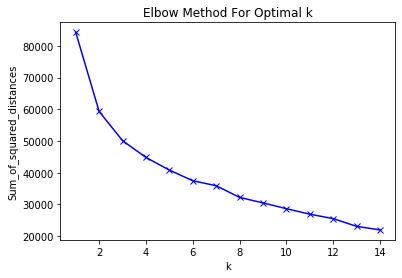

In [381]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(even_proportions)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

KMeans run with 6 clusters.

In [382]:
km = KMeans(n_clusters=6, random_state=3)
km.fit(even_proportions)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [383]:
reduced_abridged.reset_index()['University'][km.labels_ == 0]

33              Northeastern University
58    University of Southern California
68                      Yale University
Name: University, dtype: object

In [384]:
# reduced_abridged.to_csv('venues_data.csv')

In [385]:
import numpy as np

In [386]:
# reduced_abridged=pd.read_csv('venues_data.csv')

In [387]:
# reduced_abridged.drop(columns='Unnamed: 0', inplace=True)

## Making sense of initial results

For each college, we extract the 10 most common venue types so that we can compare college towns in the same clusters.

In [388]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [389]:
reduced_abridged

,Arts & Crafts Store,Clothing Store,Gift Shop,Park,Salon / Barbershop,Smoke Shop,Student Center,Tea Room,MUSEUM,BOOKSTORE,...,ART,FANCY_FOOD,JUICE,EASY_FOOD,GROCERY,SWEETS,CONVENIENCE,BREAKFAST,COFFEE,SELF_CARE
University,,,,,,,,,,,,,,,,,,,,,
Amherst College,0,0,0,1,0,0,1,0,2,1,...,1,1,0,4,0,4,0,1,1,1
Barnard College,1,0,0,4,0,0,0,1,1,3,...,1,1,0,13,3,2,5,1,6,0
Bates College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Boston College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,2,0,2,0
Boston University,0,0,0,2,1,0,0,0,0,0,...,1,1,1,5,2,3,3,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Forest University,0,0,0,0,0,0,1,0,1,0,...,0,0,0,2,0,0,1,1,2,0
Washington University in St. Louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
Wellesley College,0,1,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,1,0,0


In [390]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['University']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['University'] = reduced_abridged.reset_index()['University']

for ind in np.arange(reduced_abridged.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(reduced_abridged.iloc[ind, :], num_top_venues)

venues_sorted[km.labels_ == 4]

,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Brown University,RESTAURANT,COMMON_RESTAURANT,EASY_FOOD,COFFEE,NOVEL_RESTAURANT,SWEETS,BREAKFAST,GYM,ART,MUSEUM
17,Cooper Union,RESTAURANT,COMMON_RESTAURANT,SWEETS,COFFEE,EASY_FOOD,NOVEL_RESTAURANT,SELF_CARE,GYM,GROCERY,PUB
32,New York University,COMMON_RESTAURANT,COFFEE,SWEETS,NOVEL_RESTAURANT,RESTAURANT,GYM,EASY_FOOD,SELF_CARE,VENUE,THEATER
44,University of California - Berkeley,RESTAURANT,COMMON_RESTAURANT,COFFEE,EASY_FOOD,NOVEL_RESTAURANT,SWEETS,PUB,GYM,BREAKFAST,THEATER
52,University of Michigan - Ann Arbor,EASY_FOOD,RESTAURANT,COFFEE,THEATER,PUB,NOVEL_RESTAURANT,BREAKFAST,COMMON_RESTAURANT,ART,MUSEUM


In [391]:
reduced_abridged.columns.tolist()

['Arts & Crafts Store',
 'Clothing Store',
 'Gift Shop',
 'Park',
 'Salon / Barbershop',
 'Smoke Shop',
 'Student Center',
 'Tea Room',
 'MUSEUM',
 'BOOKSTORE',
 'COMMON_RESTAURANT',
 'NOVEL_RESTAURANT',
 'RESTAURANT',
 'GYM',
 'THEATER',
 'STADIUM',
 'VENUE',
 'LIQUOR',
 'PUB',
 'FANCY_BAR',
 'TRAIL',
 'HISTORIC',
 'SQUARE',
 'BEAUTY',
 'ART',
 'FANCY_FOOD',
 'JUICE',
 'EASY_FOOD',
 'GROCERY',
 'SWEETS',
 'CONVENIENCE',
 'BREAKFAST',
 'COFFEE',
 'SELF_CARE']

### Cluster 5

In [392]:

venues_sorted[km.labels_ == 5]

,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnard College,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,COFFEE,CONVENIENCE,Park,NOVEL_RESTAURANT,GROCERY,PUB,BOOKSTORE
4,Boston University,COMMON_RESTAURANT,COFFEE,EASY_FOOD,RESTAURANT,BREAKFAST,CONVENIENCE,SWEETS,GYM,PUB,THEATER
16,Columbia University,COMMON_RESTAURANT,EASY_FOOD,NOVEL_RESTAURANT,RESTAURANT,COFFEE,CONVENIENCE,Park,GROCERY,GYM,PUB
22,Georgetown University,EASY_FOOD,COFFEE,Park,CONVENIENCE,BEAUTY,PUB,TRAIL,GYM,GROCERY,BREAKFAST
29,Lehigh University,COMMON_RESTAURANT,EASY_FOOD,COFFEE,PUB,CONVENIENCE,RESTAURANT,SWEETS,NOVEL_RESTAURANT,SQUARE,Salon / Barbershop
30,Massachusetts Institute of Technology,EASY_FOOD,GYM,RESTAURANT,COMMON_RESTAURANT,Park,PUB,COFFEE,SQUARE,NOVEL_RESTAURANT,Tea Room
35,Pomona College,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,COFFEE,SWEETS,BREAKFAST,NOVEL_RESTAURANT,FANCY_FOOD,THEATER,SQUARE
47,University of Chicago,COFFEE,EASY_FOOD,RESTAURANT,MUSEUM,BOOKSTORE,BREAKFAST,CONVENIENCE,SWEETS,THEATER,COMMON_RESTAURANT
63,Virginia Tech,COMMON_RESTAURANT,EASY_FOOD,PUB,COFFEE,BREAKFAST,RESTAURANT,CONVENIENCE,BOOKSTORE,SWEETS,NOVEL_RESTAURANT


### Cluster 4

In [393]:
venues_sorted[km.labels_ == 4]

,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Brown University,RESTAURANT,COMMON_RESTAURANT,EASY_FOOD,COFFEE,NOVEL_RESTAURANT,SWEETS,BREAKFAST,GYM,ART,MUSEUM
17,Cooper Union,RESTAURANT,COMMON_RESTAURANT,SWEETS,COFFEE,EASY_FOOD,NOVEL_RESTAURANT,SELF_CARE,GYM,GROCERY,PUB
32,New York University,COMMON_RESTAURANT,COFFEE,SWEETS,NOVEL_RESTAURANT,RESTAURANT,GYM,EASY_FOOD,SELF_CARE,VENUE,THEATER
44,University of California - Berkeley,RESTAURANT,COMMON_RESTAURANT,COFFEE,EASY_FOOD,NOVEL_RESTAURANT,SWEETS,PUB,GYM,BREAKFAST,THEATER
52,University of Michigan - Ann Arbor,EASY_FOOD,RESTAURANT,COFFEE,THEATER,PUB,NOVEL_RESTAURANT,BREAKFAST,COMMON_RESTAURANT,ART,MUSEUM


### Cluster 3

In [394]:

venues_sorted[km.labels_ == 3]

,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Harvard University,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,SQUARE,PUB,BOOKSTORE,VENUE,COFFEE,Park,SWEETS
55,University of Pennsylvania,EASY_FOOD,COMMON_RESTAURANT,COFFEE,SQUARE,RESTAURANT,BREAKFAST,SWEETS,SELF_CARE,BOOKSTORE,ART


### Cluster 2

In [395]:

venues_sorted[km.labels_ == 2]

,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amherst College,COMMON_RESTAURANT,RESTAURANT,SWEETS,EASY_FOOD,PUB,MUSEUM,SELF_CARE,Student Center,THEATER,BOOKSTORE
2,Bates College,SWEETS,COMMON_RESTAURANT,VENUE,SELF_CARE,BOOKSTORE,THEATER,GYM,RESTAURANT,NOVEL_RESTAURANT,Tea Room
3,Boston College,CONVENIENCE,SWEETS,COFFEE,BEAUTY,STADIUM,EASY_FOOD,COMMON_RESTAURANT,MUSEUM,RESTAURANT,NOVEL_RESTAURANT
5,Bowdoin College,COMMON_RESTAURANT,PUB,RESTAURANT,EASY_FOOD,COFFEE,MUSEUM,THEATER,CONVENIENCE,Park,GROCERY
8,Bryn Mawr College,COMMON_RESTAURANT,BREAKFAST,EASY_FOOD,SELF_CARE,MUSEUM,GYM,RESTAURANT,NOVEL_RESTAURANT,BOOKSTORE,Student Center
11,Case Western Reserve University,EASY_FOOD,RESTAURANT,BREAKFAST,COFFEE,COMMON_RESTAURANT,PUB,GROCERY,GYM,FANCY_BAR,SELF_CARE
13,Colgate University,TRAIL,COFFEE,GYM,BEAUTY,SELF_CARE,STADIUM,RESTAURANT,NOVEL_RESTAURANT,COMMON_RESTAURANT,BOOKSTORE
15,Colorado College,LIQUOR,MUSEUM,CONVENIENCE,COMMON_RESTAURANT,COFFEE,ART,GYM,TRAIL,SELF_CARE,Clothing Store
20,Duke University,COMMON_RESTAURANT,GYM,THEATER,COFFEE,MUSEUM,BEAUTY,ART,EASY_FOOD,BREAKFAST,Smoke Shop
21,Emory University,COFFEE,GYM,EASY_FOOD,MUSEUM,BREAKFAST,Park,RESTAURANT,FANCY_FOOD,NOVEL_RESTAURANT,COMMON_RESTAURANT


### Cluster 1

In [396]:
venues_sorted[km.labels_ == 1]


,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Brigham Young University,SWEETS,EASY_FOOD,SQUARE,COMMON_RESTAURANT,MUSEUM,Tea Room,COFFEE,Salon / Barbershop,NOVEL_RESTAURANT,RESTAURANT
9,California Institute of Technology,COFFEE,SWEETS,EASY_FOOD,COMMON_RESTAURANT,SQUARE,BREAKFAST,RESTAURANT,GYM,LIQUOR,FANCY_BAR
10,Carnegie Mellon University,RESTAURANT,COFFEE,EASY_FOOD,COMMON_RESTAURANT,MUSEUM,SQUARE,ART,BEAUTY,VENUE,BOOKSTORE
12,Claremont McKenna College,COFFEE,COMMON_RESTAURANT,RESTAURANT,CONVENIENCE,EASY_FOOD,SQUARE,SELF_CARE,SWEETS,Park,MUSEUM
14,College of William and Mary,COMMON_RESTAURANT,EASY_FOOD,COFFEE,PUB,SQUARE,BEAUTY,MUSEUM,THEATER,CONVENIENCE,ART
18,Cornell University,COFFEE,EASY_FOOD,COMMON_RESTAURANT,GYM,BEAUTY,MUSEUM,THEATER,BOOKSTORE,VENUE,PUB
19,Dartmouth College,RESTAURANT,EASY_FOOD,COFFEE,COMMON_RESTAURANT,CONVENIENCE,Clothing Store,BOOKSTORE,VENUE,SQUARE,SWEETS
23,Georgia Institute of Technology,COMMON_RESTAURANT,COFFEE,EASY_FOOD,SQUARE,THEATER,BREAKFAST,RESTAURANT,VENUE,ART,GYM
26,Harvey Mudd College,COFFEE,COMMON_RESTAURANT,SQUARE,CONVENIENCE,SWEETS,EASY_FOOD,BEAUTY,SELF_CARE,Tea Room,NOVEL_RESTAURANT
36,Princeton University,SQUARE,COFFEE,COMMON_RESTAURANT,BEAUTY,RESTAURANT,VENUE,PUB,BOOKSTORE,MUSEUM,THEATER


### Cluster 0

In [397]:

venues_sorted[km.labels_ == 0]

,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Northeastern University,EASY_FOOD,COMMON_RESTAURANT,VENUE,COFFEE,ART,SWEETS,RESTAURANT,MUSEUM,NOVEL_RESTAURANT,GROCERY
58,University of Southern California,MUSEUM,EASY_FOOD,COMMON_RESTAURANT,COFFEE,THEATER,RESTAURANT,NOVEL_RESTAURANT,STADIUM,GROCERY,SWEETS
68,Yale University,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,SWEETS,COFFEE,BREAKFAST,THEATER,MUSEUM,ART,NOVEL_RESTAURANT


## Incorporating School Size

From another data set we prepared, we incorporate school size as another way of quantifying "feel" and add this to our clustering procedure. The size columns are scaled so as to have the same spread as the other parameter groups (shops, food/beverage, recreation and surroundings.

In [398]:
other_info= pd.read_csv('school_type_rank_aid.csv')

In [399]:
other_info.drop(columns='Unnamed: 0', inplace=True)

In [400]:
other_info.head()

,University,Large,Medium,Public,Liberal Arts,Small,Rank,Private,Total Cost of Attendance,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
0,Massachusetts Institute of Technology,False,True,False,False,False,1.0,True,73160.0,73160.0,457.0,10.0,True,True,False,78.0,56675.0,16485.0,28887.0
1,Stanford University,False,True,False,False,False,2.0,True,75470.0,75470.0,739.0,11.0,True,True,False,27.0,60250.0,15220.0,59083.0
2,Yale University,False,True,False,False,False,3.0,True,76490.0,76490.0,646.0,11.0,True,True,False,57.0,62089.0,14401.0,41120.0
3,Harvard University,False,True,False,False,False,4.0,True,73800.0,73800.0,814.0,12.0,True,True,False,73.0,61703.0,12097.0,29001.0
4,Princeton University,False,True,False,False,False,5.0,True,70850.0,70850.0,653.0,12.0,True,True,False,70.0,54271.0,16579.0,32702.0


In [401]:
size_and_feel = other_info.iloc[:,:8]

In [402]:
size_and_feel

,University,Large,Medium,Public,Liberal Arts,Small,Rank,Private
0,Massachusetts Institute of Technology,False,True,False,False,False,1.0,True
1,Stanford University,False,True,False,False,False,2.0,True
2,Yale University,False,True,False,False,False,3.0,True
3,Harvard University,False,True,False,False,False,4.0,True
4,Princeton University,False,True,False,False,False,5.0,True
...,...,...,...,...,...,...,...,...
73,University of California - Santa Barbara,True,False,True,False,False,75.0,False
74,University of Rochester,False,True,False,False,False,76.0,False
75,Southern Methodist University,False,True,False,False,False,77.0,False
76,Brigham Young University,True,False,False,False,False,78.0,False


In [403]:
size_and_feel.drop(columns='Rank', inplace=True)

In [404]:
size_and_feel.head()

,University,Large,Medium,Public,Liberal Arts,Small,Private
0,Massachusetts Institute of Technology,False,True,False,False,False,True
1,Stanford University,False,True,False,False,False,True
2,Yale University,False,True,False,False,False,True
3,Harvard University,False,True,False,False,False,True
4,Princeton University,False,True,False,False,False,True


In [405]:
size_and_feel.iloc[:,1:] = size_and_feel.iloc[:,1:].astype('float')

In [406]:
size_and_feel

,University,Large,Medium,Public,Liberal Arts,Small,Private
0,Massachusetts Institute of Technology,0.0,1.0,0.0,0.0,0.0,1.0
1,Stanford University,0.0,1.0,0.0,0.0,0.0,1.0
2,Yale University,0.0,1.0,0.0,0.0,0.0,1.0
3,Harvard University,0.0,1.0,0.0,0.0,0.0,1.0
4,Princeton University,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
73,University of California - Santa Barbara,1.0,0.0,1.0,0.0,0.0,0.0
74,University of Rochester,0.0,1.0,0.0,0.0,0.0,0.0
75,Southern Methodist University,0.0,1.0,0.0,0.0,0.0,0.0
76,Brigham Young University,1.0,0.0,0.0,0.0,0.0,0.0


In [407]:
size_and_feel.drop(columns=['Public', 'Private'], inplace=True)

In [408]:
size_and_feel.drop(columns='Liberal Arts', inplace=True)

In [409]:
size = size_and_feel.set_index('University')

In [410]:
size

,Large,Medium,Small
University,,,
Massachusetts Institute of Technology,0.0,1.0,0.0
Stanford University,0.0,1.0,0.0
Yale University,0.0,1.0,0.0
Harvard University,0.0,1.0,0.0
Princeton University,0.0,1.0,0.0
...,...,...,...
University of California - Santa Barbara,1.0,0.0,0.0
University of Rochester,0.0,1.0,0.0
Southern Methodist University,0.0,1.0,0.0


In [411]:
even_proportions[food_and_beverage].max().sum()

187.99999999999997

In [412]:
size = size * ((even_proportions[food_and_beverage].max().sum()) / 18)

In [413]:
size

,Large,Medium,Small
University,,,
Massachusetts Institute of Technology,0.000000,10.444444,0.0
Stanford University,0.000000,10.444444,0.0
Yale University,0.000000,10.444444,0.0
Harvard University,0.000000,10.444444,0.0
Princeton University,0.000000,10.444444,0.0
...,...,...,...
University of California - Santa Barbara,10.444444,0.000000,0.0
University of Rochester,0.000000,10.444444,0.0
Southern Methodist University,0.000000,10.444444,0.0


In [414]:
size_and_neighborhood=even_proportions.join(size, how='left', on='University')

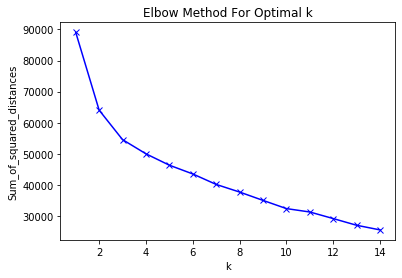

In [415]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(size_and_neighborhood)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [416]:
size_and_neighborhood

,Arts & Crafts Store,Clothing Store,Gift Shop,Park,Salon / Barbershop,Smoke Shop,Student Center,Tea Room,MUSEUM,BOOKSTORE,...,EASY_FOOD,GROCERY,SWEETS,CONVENIENCE,BREAKFAST,COFFEE,SELF_CARE,Large,Medium,Small
University,,,,,,,,,,,,,,,,,,,,,
Amherst College,0.000000,0.000000,0.0,10.444444,0.000000,0.000000,4.0,0.000000,8.0,4.272727,...,9.518987,0.000000,17.090909,0.000000,2.379747,4.272727,4.0,0.000000,0.000000,10.444444
Barnard College,4.272727,0.000000,0.0,41.777778,0.000000,0.000000,0.0,2.379747,4.0,12.818182,...,30.936709,12.818182,8.545455,21.363636,2.379747,25.636364,0.0,0.000000,0.000000,10.444444
Bates College,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,4.272727,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10.444444
Boston College,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,2.379747,0.000000,8.545455,8.545455,0.000000,8.545455,0.0,0.000000,10.444444,0.000000
Boston University,0.000000,0.000000,0.0,20.888889,4.272727,0.000000,0.0,0.000000,0.0,0.000000,...,11.898734,8.545455,12.818182,12.818182,9.518987,25.636364,8.0,10.444444,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Forest University,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.0,0.000000,4.0,0.000000,...,4.759494,0.000000,0.000000,4.272727,2.379747,8.545455,0.0,0.000000,10.444444,0.000000
Washington University in St. Louis,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,2.379747,0.000000,0.000000,0.000000,2.379747,4.272727,0.0,0.000000,10.444444,0.000000
Wellesley College,0.000000,4.272727,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4.0,4.272727,...,2.379747,0.000000,0.000000,0.000000,2.379747,0.000000,0.0,0.000000,0.000000,10.444444


In [417]:
km = KMeans(n_clusters=6, random_state=3)
km.fit(size_and_neighborhood)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

We can confirm that university size has not had an overpowering impact on groupings.

In [418]:
size_and_neighborhood.reset_index()[['University', 'Small', 'Medium', 'Large']][km.labels_ == 5]

,University,Small,Medium,Large
4,Boston University,0.000000,0.000000,10.444444
7,Brown University,0.000000,10.444444,0.000000
29,Lehigh University,0.000000,10.444444,0.000000
33,Northeastern University,0.000000,10.444444,0.000000
35,Pomona College,10.444444,0.000000,0.000000
47,University of Chicago,0.000000,10.444444,0.000000
52,University of Michigan - Ann Arbor,0.000000,0.000000,10.444444
55,University of Pennsylvania,0.000000,10.444444,0.000000
58,University of Southern California,0.000000,0.000000,10.444444
63,Virginia Tech,0.000000,0.000000,10.444444


## Compile Data Set

We recompile the data set with 10 most common venue information, school rank and financial aid information, along with the cluster label.

In [419]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['University']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['University'] = reduced_abridged.reset_index()['University']

for ind in np.arange(reduced_abridged.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(reduced_abridged.iloc[ind, :], num_top_venues)

In [420]:
clustered = venues_sorted.copy()

In [421]:
clustered['Cluster'] = km.labels_

In [422]:
informational_set = clustered.join(other_info.set_index('University').iloc[:,7:], how='left', on='University')

In [423]:
column_list = informational_set.columns.tolist()

In [424]:
new_column_list = [column_list[0] ] + [column_list[11]]+ column_list[1:11]+ column_list[12:]

In [425]:
informational_set = informational_set[new_column_list]

In [426]:
informational_set

,University,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
0,Amherst College,2,COMMON_RESTAURANT,RESTAURANT,SWEETS,EASY_FOOD,PUB,MUSEUM,SELF_CARE,Student Center,...,73966.0,151.0,8.0,True,True,False,89.0,66093.0,7873.0,14876.0
1,Barnard College,4,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,COFFEE,CONVENIENCE,Park,NOVEL_RESTAURANT,GROCERY,...,78044.0,249.0,9.0,True,True,False,12.0,62097.0,15947.0,70562.0
2,Bates College,2,SWEETS,COMMON_RESTAURANT,VENUE,SELF_CARE,BOOKSTORE,THEATER,GYM,RESTAURANT,...,73538.0,142.0,8.0,True,True,False,56.0,59258.0,14280.0,40153.0
3,Boston College,2,CONVENIENCE,SWEETS,COFFEE,BEAUTY,STADIUM,EASY_FOOD,COMMON_RESTAURANT,MUSEUM,...,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,NaN
4,Boston University,5,COMMON_RESTAURANT,COFFEE,EASY_FOOD,RESTAURANT,BREAKFAST,CONVENIENCE,SWEETS,GYM,...,71618.0,3687.0,22.0,False,True,False,6.0,34717.0,36901.0,69490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Wake Forest University,2,COFFEE,EASY_FOOD,Student Center,MUSEUM,BREAKFAST,CONVENIENCE,COMMON_RESTAURANT,RESTAURANT,...,68900.0,521.0,10.0,False,True,False,15.0,14280.0,54620.0,66762.0
65,Washington University in St. Louis,2,VENUE,COMMON_RESTAURANT,BREAKFAST,COFFEE,EASY_FOOD,THEATER,BOOKSTORE,GYM,...,76910.0,551.0,8.0,True,True,False,12.0,47748.0,29162.0,71191.0
66,Wellesley College,2,COMMON_RESTAURANT,Clothing Store,FANCY_FOOD,PUB,BOOKSTORE,TRAIL,MUSEUM,GYM,...,74948.0,324.0,14.0,True,True,False,27.0,64514.0,10434.0,57227.0
67,Wesleyan University,2,COFFEE,EASY_FOOD,RESTAURANT,COMMON_RESTAURANT,GYM,BREAKFAST,CONVENIENCE,NOVEL_RESTAURANT,...,73000.0,364.0,12.0,True,True,False,24.0,64017.0,8983.0,57347.0


In [427]:
informational_set['Rank'] = other_info.iloc[:,6]

In [428]:
informational_set.columns

Index(['University', 'Cluster', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue', 'Total Cost of Attendance',
       'Full-Time Undergrads', 'Full-Time Nonresident Aliens ',
       'Percentage of Nonresident Aliens to All Undergrads',
       'Policy: Need-based', 'Policy: Merit', 'Policy: No Aid',
       'Percentage of Nonresident Aliens Receiving Aid', 'Average Aid Award',
       'Average Cost with Aid', 'Expected Cost', 'Rank'],
      dtype='object')

In [429]:
column_set = informational_set.columns.values

In [430]:
column_set

array(['University', 'Cluster', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue', 'Total Cost of Attendance',
       'Full-Time Undergrads', 'Full-Time Nonresident Aliens ',
       'Percentage of Nonresident Aliens to All Undergrads',
       'Policy: Need-based', 'Policy: Merit', 'Policy: No Aid',
       'Percentage of Nonresident Aliens Receiving Aid',
       'Average Aid Award', 'Average Cost with Aid', 'Expected Cost',
       'Rank'], dtype=object)

In [431]:
columns = list(column_set[0:2]) + [column_set[-1]] + list(column_set[2:-1])

In [432]:
columns

['University',
 'Cluster',
 'Rank',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue',
 'Total Cost of Attendance',
 'Full-Time Undergrads',
 'Full-Time Nonresident Aliens ',
 'Percentage of Nonresident Aliens to All Undergrads',
 'Policy: Need-based',
 'Policy: Merit',
 'Policy: No Aid',
 'Percentage of Nonresident Aliens Receiving Aid',
 'Average Aid Award',
 'Average Cost with Aid',
 'Expected Cost']

In [433]:
informational_set = informational_set[columns]

In [434]:
informational_set['Rank'] = informational_set['Rank'].astype('int64')

### Cluster 0 with Full Information

In [435]:
informational_set.set_index('Cluster').loc[0]

,University,Rank,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
Cluster,,,,,,,,,,,,,,,,,,,,,
0,Cooper Union,18,RESTAURANT,COMMON_RESTAURANT,SWEETS,COFFEE,EASY_FOOD,NOVEL_RESTAURANT,SELF_CARE,GYM,...,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,NaN
0,New York University,33,COMMON_RESTAURANT,COFFEE,SWEETS,NOVEL_RESTAURANT,RESTAURANT,GYM,EASY_FOOD,SELF_CARE,...,76612.0,5394.0,21.0,True,True,False,14.0,20376.0,56236.0,73669.0
0,University of California - Berkeley,46,RESTAURANT,COMMON_RESTAURANT,COFFEE,EASY_FOOD,NOVEL_RESTAURANT,SWEETS,PUB,GYM,...,36410.0,4000.0,14.0,False,True,True,0.0,0.0,36410.0,36410.0


### Cluster 1 with Full Information


In [436]:

informational_set.set_index('Cluster').loc[1]

,University,Rank,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
Cluster,,,,,,,,,,,,,,,,,,,,,
1,Brigham Young University,7,SWEETS,EASY_FOOD,SQUARE,COMMON_RESTAURANT,MUSEUM,Tea Room,COFFEE,Salon / Barbershop,...,19236.0,1026.0,4.0,True,True,False,52.0,5704.0,13532.0,16289.0
1,California Institute of Technology,10,COFFEE,SWEETS,EASY_FOOD,COMMON_RESTAURANT,SQUARE,BREAKFAST,RESTAURANT,GYM,...,74763.0,83.0,9.0,True,True,False,35.0,53060.0,21703.0,56224.0
1,Carnegie Mellon University,11,RESTAURANT,COFFEE,EASY_FOOD,COMMON_RESTAURANT,MUSEUM,SQUARE,ART,BEAUTY,...,74116.0,1507.0,23.0,False,True,True,0.0,0.0,74116.0,74116.0
1,Claremont McKenna College,13,COFFEE,COMMON_RESTAURANT,RESTAURANT,CONVENIENCE,EASY_FOOD,SQUARE,SELF_CARE,SWEETS,...,73000.0,212.0,16.0,True,True,False,15.0,51364.0,21636.0,65489.0
1,College of William and Mary,15,COMMON_RESTAURANT,EASY_FOOD,COFFEE,PUB,SQUARE,BEAUTY,MUSEUM,THEATER,...,38889.0,381.0,6.0,False,True,True,0.0,0.0,38889.0,38889.0
1,Cornell University,19,COFFEE,EASY_FOOD,COMMON_RESTAURANT,GYM,BEAUTY,MUSEUM,THEATER,BOOKSTORE,...,75243.0,1589.0,11.0,True,True,False,11.0,62170.0,13073.0,68240.0
1,Dartmouth College,20,RESTAURANT,EASY_FOOD,COFFEE,COMMON_RESTAURANT,CONVENIENCE,Clothing Store,BOOKSTORE,VENUE,...,77326.0,403.0,9.0,True,True,False,63.0,64516.0,12810.0,36663.0
1,Georgia Institute of Technology,24,COMMON_RESTAURANT,COFFEE,EASY_FOOD,SQUARE,THEATER,BREAKFAST,RESTAURANT,VENUE,...,31080.0,1375.0,10.0,False,True,True,0.0,0.0,31080.0,31080.0
1,Harvey Mudd College,27,COFFEE,COMMON_RESTAURANT,SQUARE,CONVENIENCE,SWEETS,EASY_FOOD,BEAUTY,SELF_CARE,...,77753.0,83.0,10.0,True,True,False,31.0,31465.0,46288.0,67896.0


### Cluster 2 with Full Information

In [437]:

informational_set.set_index('Cluster').loc[2]

,University,Rank,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
Cluster,,,,,,,,,,,,,,,,,,,,,
2,Amherst College,1,COMMON_RESTAURANT,RESTAURANT,SWEETS,EASY_FOOD,PUB,MUSEUM,SELF_CARE,Student Center,...,73966.0,151.0,8.0,True,True,False,89.0,66093.0,7873.0,14876.0
2,Bates College,3,SWEETS,COMMON_RESTAURANT,VENUE,SELF_CARE,BOOKSTORE,THEATER,GYM,RESTAURANT,...,73538.0,142.0,8.0,True,True,False,56.0,59258.0,14280.0,40153.0
2,Boston College,4,CONVENIENCE,SWEETS,COFFEE,BEAUTY,STADIUM,EASY_FOOD,COMMON_RESTAURANT,MUSEUM,...,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,NaN
2,Bowdoin College,6,COMMON_RESTAURANT,PUB,RESTAURANT,EASY_FOOD,COFFEE,MUSEUM,THEATER,CONVENIENCE,...,70710.0,107.0,6.0,True,True,False,49.0,56919.0,13791.0,43048.0
2,Bryn Mawr College,9,COMMON_RESTAURANT,BREAKFAST,EASY_FOOD,SELF_CARE,MUSEUM,GYM,RESTAURANT,NOVEL_RESTAURANT,...,73990.0,291.0,22.0,True,True,False,40.0,55060.0,18930.0,52042.0
2,Case Western Reserve University,12,EASY_FOOD,RESTAURANT,BREAKFAST,COFFEE,COMMON_RESTAURANT,PUB,GROCERY,GYM,...,70118.0,693.0,14.0,True,True,False,18.0,31870.0,38248.0,64277.0
2,Colgate University,14,TRAIL,COFFEE,GYM,BEAUTY,SELF_CARE,STADIUM,RESTAURANT,NOVEL_RESTAURANT,...,75000.0,276.0,9.0,True,True,False,56.0,61103.0,13897.0,40685.0
2,Colorado College,16,LIQUOR,MUSEUM,CONVENIENCE,COMMON_RESTAURANT,COFFEE,ART,GYM,TRAIL,...,73600.0,184.0,9.0,True,True,False,59.0,44485.0,29115.0,47247.0
2,Duke University,21,COMMON_RESTAURANT,GYM,THEATER,COFFEE,MUSEUM,BEAUTY,ART,EASY_FOOD,...,77569.0,658.0,10.0,True,True,False,32.0,66754.0,10815.0,55960.0


### Cluster 3 with Full Information

In [438]:

informational_set.set_index('Cluster').loc[3]

,University,Rank,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
Cluster,,,,,,,,,,,,,,,,,,,,,
3,Harvard University,26,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,SQUARE,PUB,BOOKSTORE,VENUE,COFFEE,...,73800.0,814.0,12.0,True,True,False,73.0,61703.0,12097.0,29001.0
3,Princeton University,38,SQUARE,COFFEE,COMMON_RESTAURANT,BEAUTY,RESTAURANT,VENUE,PUB,BOOKSTORE,...,70850.0,653.0,12.0,True,True,False,70.0,54271.0,16579.0,32702.0
3,University of California - Los Angeles,47,COFFEE,EASY_FOOD,SQUARE,COMMON_RESTAURANT,ART,BEAUTY,VENUE,MUSEUM,...,34831.0,3645.0,12.0,False,True,False,3.0,26372.0,8459.0,34013.0


### Cluster 4 with Full Information

In [439]:

informational_set.set_index('Cluster').loc[4]

,University,Rank,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
Cluster,,,,,,,,,,,,,,,,,,,,,
4,Barnard College,2,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,COFFEE,CONVENIENCE,Park,NOVEL_RESTAURANT,GROCERY,...,78044.0,249.0,9.0,True,True,False,12.0,62097.0,15947.0,70562.0
4,Columbia University,17,COMMON_RESTAURANT,EASY_FOOD,NOVEL_RESTAURANT,RESTAURANT,COFFEE,CONVENIENCE,Park,GROCERY,...,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,NaN
4,Georgetown University,23,EASY_FOOD,COFFEE,Park,CONVENIENCE,BEAUTY,PUB,TRAIL,GYM,...,77768.0,991.0,14.0,True,True,False,3.0,69406.0,8362.0,75737.0
4,Massachusetts Institute of Technology,31,EASY_FOOD,GYM,RESTAURANT,COMMON_RESTAURANT,Park,PUB,COFFEE,SQUARE,...,73160.0,457.0,10.0,True,True,False,78.0,56675.0,16485.0,28887.0
4,Stanford University,43,COFFEE,ART,EASY_FOOD,BEAUTY,SQUARE,MUSEUM,STADIUM,HISTORIC,...,75470.0,739.0,11.0,True,True,False,27.0,60250.0,15220.0,59083.0


### Cluster 5 with Full Information

In [440]:

informational_set.set_index('Cluster').loc[5]

,University,Rank,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Full-Time Undergrads,Full-Time Nonresident Aliens,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost
Cluster,,,,,,,,,,,,,,,,,,,,,
5,Boston University,5,COMMON_RESTAURANT,COFFEE,EASY_FOOD,RESTAURANT,BREAKFAST,CONVENIENCE,SWEETS,GYM,...,71618.0,3687.0,22.0,False,True,False,6.0,34717.0,36901.0,69490.0
5,Brown University,8,RESTAURANT,COMMON_RESTAURANT,EASY_FOOD,COFFEE,NOVEL_RESTAURANT,SWEETS,BREAKFAST,GYM,...,77490.0,751.0,11.0,True,True,False,17.0,62935.0,14555.0,66763.0
5,Lehigh University,30,COMMON_RESTAURANT,EASY_FOOD,COFFEE,PUB,CONVENIENCE,RESTAURANT,SWEETS,NOVEL_RESTAURANT,...,71465.0,459.0,9.0,True,True,False,22.0,48706.0,22759.0,60748.0
5,Northeastern University,34,EASY_FOOD,COMMON_RESTAURANT,VENUE,COFFEE,ART,SWEETS,RESTAURANT,MUSEUM,...,73236.0,3214.0,18.0,False,True,False,14.0,18031.0,55205.0,70622.0
5,Pomona College,36,COMMON_RESTAURANT,EASY_FOOD,RESTAURANT,COFFEE,SWEETS,BREAKFAST,NOVEL_RESTAURANT,FANCY_FOOD,...,75080.0,189.0,11.0,True,True,False,44.0,59477.0,15603.0,48960.0
5,University of Chicago,49,COFFEE,EASY_FOOD,RESTAURANT,MUSEUM,BOOKSTORE,BREAKFAST,CONVENIENCE,SWEETS,...,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,NaN
5,University of Michigan - Ann Arbor,54,EASY_FOOD,RESTAURANT,COFFEE,THEATER,PUB,NOVEL_RESTAURANT,BREAKFAST,COMMON_RESTAURANT,...,30298.0,2107.0,7.0,False,True,True,0.0,0.0,30298.0,30298.0
5,University of Pennsylvania,57,EASY_FOOD,COMMON_RESTAURANT,COFFEE,SQUARE,RESTAURANT,BREAKFAST,SWEETS,SELF_CARE,...,78186.0,1320.0,13.0,True,True,False,26.0,51724.0,26462.0,64589.0
5,University of Southern California,60,MUSEUM,EASY_FOOD,COMMON_RESTAURANT,COFFEE,THEATER,RESTAURANT,NOVEL_RESTAURANT,STADIUM,...,73270.0,2491.0,13.0,False,True,False,21.0,18069.0,55201.0,69433.0


In [441]:
informational_set.to_csv('informational_set.csv')

## Map Visualization

In [442]:
import folium

In [443]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [451]:
latitude = 37.0902
longitude = -95.7129
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

add_lat_lng = informational_set.join(data[['University', 'Latitude', 'Longitude']].set_index('University'), how='left', on='University')

# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(add_lat_lng['Latitude'], add_lat_lng['Longitude'], add_lat_lng['University'], add_lat_lng['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters